# Prior Predictive Analysis for GARCH(1,1) Model

-  Step 1: Simulate hypothetical parameters iid via generated quantities block in Stan

- Step 2: Compute simulated data via the likelihood function (in Stan)

- Step 3: Compare simulated data with observed data to validate priors

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Current working directory: ", os.getcwd())

Current working directory:  c:\Users\nklatsky\econometrics\econometrics2024\project\code\garch


## Read in Real Data

In [3]:
# Read in the train-test split 
# Read train_test.csv
train_test_split = pd.read_csv("../../train_test.csv")
train_size = train_test_split['train'][0]
test_size = train_test_split['test'][0]

# Define data path:
data_path = "../../data/DXY_approx_percent_returns.csv"
real_data = pd.read_csv(data_path, index_col=0)
real_data = real_data - np.mean(real_data)

# calculate the splitting point as the train_size * len of data, rounded
split_point = int(train_size * len(real_data))

# Take training data range only
real_data = real_data.iloc[:split_point]
real_data


,DXY
Date,
1994-04-01,-0.435009
1994-05-01,0.030122
1994-06-01,0.247245
1994-07-01,-0.768186
1994-10-01,0.362673
...,...
2018-02-21,0.315110
2018-02-22,-0.294709
2018-02-23,0.162735


## Read in Generated Data

In [4]:
# Read in generated data from prior predictive distribution(y_sim_samples)

garch_y_sim_path = "sampler_outputs/y_sim_samples.csv"
garch_y_sim = pd.read_csv(garch_y_sim_path)
garch_y_sim

,0,1,2,3,4,5,6,7,8,9,...,6231,6232,6233,6234,6235,6236,6237,6238,6239,6240
0,0.072006,-0.113774,-3.901280,3.596520,1.054730,-5.765620,-0.779214,1.968060,5.888470,1.301640,...,-2.608600,1.679950,7.205930,5.018920,-0.476845,1.357340,-0.020484,2.177920,-2.352710,-3.189680
1,1.072480,-0.526780,-1.833150,1.125490,-0.223319,-0.063349,-0.216732,0.179047,-0.099477,-0.438893,...,0.492548,-0.443688,-0.340378,-0.125423,0.604465,-1.012470,0.422561,-0.908697,-0.892226,0.105573
2,-1.248250,-0.352013,-1.378830,-1.792740,2.699730,-4.057800,2.124190,-0.722585,2.829610,0.311854,...,-1.083480,1.473100,-0.422312,-0.089925,-0.061099,-0.005482,-0.449735,-0.280241,2.718120,0.868600
3,1.153790,0.812858,-1.042490,-0.610064,1.396930,0.369611,0.492029,0.908790,-0.152546,-0.880732,...,-0.099671,-0.218170,-0.778077,-0.898503,0.535941,0.716794,0.536546,-0.795955,-0.949865,0.237684
4,-0.665225,-0.451270,-1.446660,-0.725740,-0.552237,0.194953,-1.701050,-2.117320,1.674730,0.615806,...,-1.112050,-0.783370,0.359342,-1.059950,0.614493,0.927394,-0.621258,0.268023,0.189659,-2.909390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.379552,-0.712748,-1.802840,1.331540,-0.701541,0.878502,0.820122,1.602800,2.402890,1.886510,...,-0.315416,0.527107,1.276020,0.893407,0.396827,0.183340,0.760149,-0.810294,-1.139550,-0.042102
3996,1.375100,1.043630,-0.937244,-0.939175,1.218390,-1.472290,-0.193415,0.078769,-0.365197,-0.196942,...,1.111690,-1.464350,-0.572840,-3.616090,0.753261,-1.215510,-0.070657,-0.224201,1.292500,-1.627250
3997,1.525960,-1.320110,-1.503620,0.437468,0.491484,1.021790,-0.430131,-0.811310,0.150035,-0.329806,...,0.839734,-0.556912,-1.172650,0.549522,-0.903935,-0.132421,-0.054665,-0.016865,0.089473,0.175257
3998,1.191170,-0.063472,0.956458,-0.191357,-1.908060,-1.555900,-2.532550,1.102300,-3.966020,0.812145,...,0.576965,-0.624672,0.991840,-1.970260,0.610825,-0.558100,-0.060058,0.233586,-0.529279,0.451089


In [5]:
# Read in the generated parameters to validate:

alpha1_sim_path = "sampler_outputs/alpha1_sim_samples.csv"
beta1_sim_path = "sampler_outputs/beta1_sim_samples.csv"
mu_sim_path = "sampler_outputs/mu_sim_samples.csv"
sigma_sim_path = "sampler_outputs/sigma_sim_samples.csv"

alpha1_sim = pd.read_csv(alpha1_sim_path)
beta1_sim = pd.read_csv(beta1_sim_path)
mu_sim = pd.read_csv(mu_sim_path)
sigma_sim = pd.read_csv(sigma_sim_path)




# Comparison

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.012135665417401053


Real std:  DXY    0.49879
dtype: float64
Simulated std:  4.829944944385795


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -44.1584


Real max:  DXY    2.51896
dtype: float64
Simulated max:  68.8671




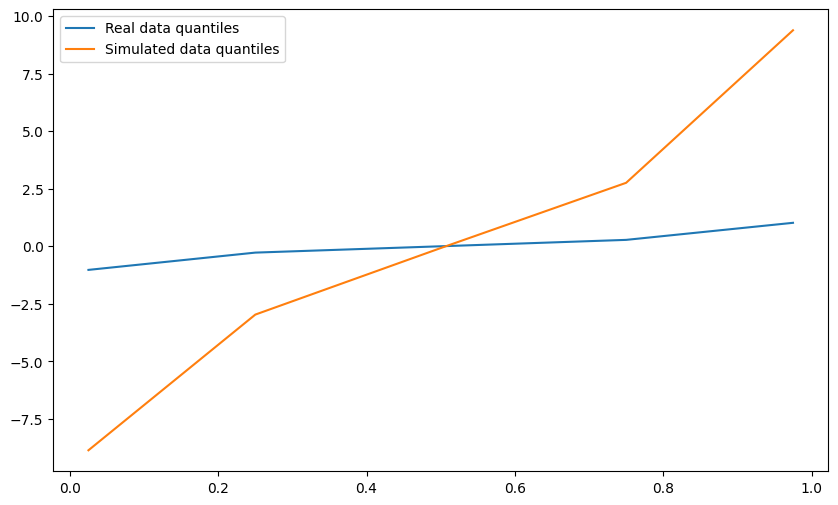

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.004623898658836726


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.247191937676158


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -12.2048


Real max:  DXY    2.51896
dtype: float64
Simulated max:  8.75052




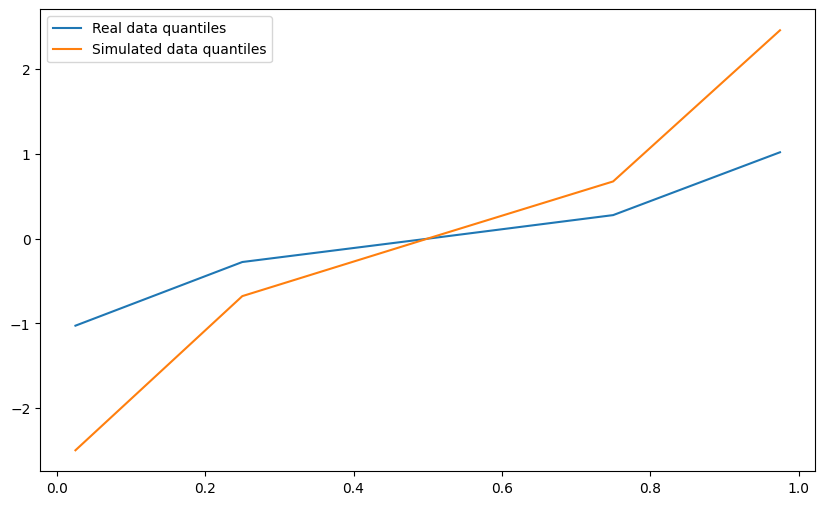

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.043327705219772465


Real std:  DXY    0.49879
dtype: float64
Simulated std:  2.1144300924083286


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -9.97528


Real max:  DXY    2.51896
dtype: float64
Simulated max:  8.73404




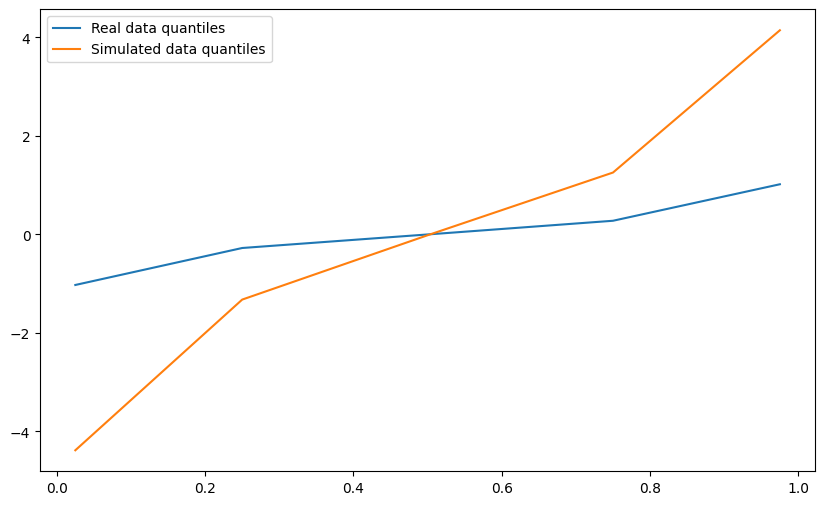

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.043205709398557925


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.4643109279159874


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -6.02559


Real max:  DXY    2.51896
dtype: float64
Simulated max:  6.45202




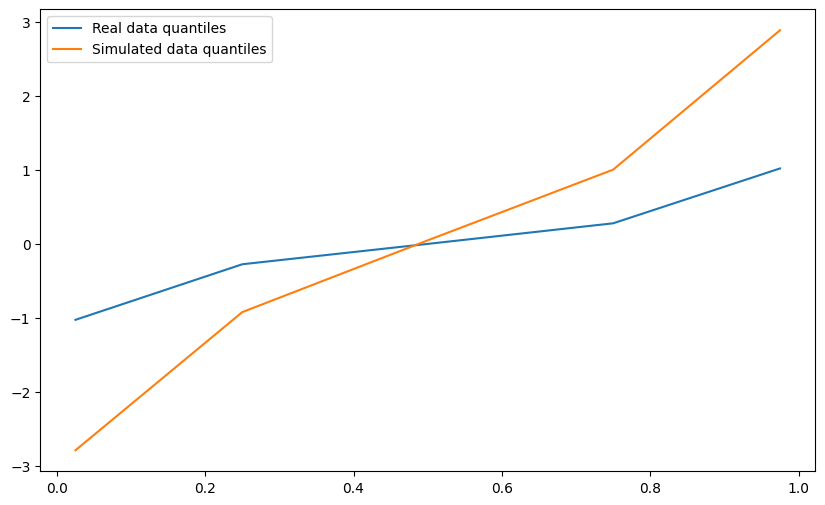

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.027581236899663516


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.9604122801406503


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -7.26634


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.98224




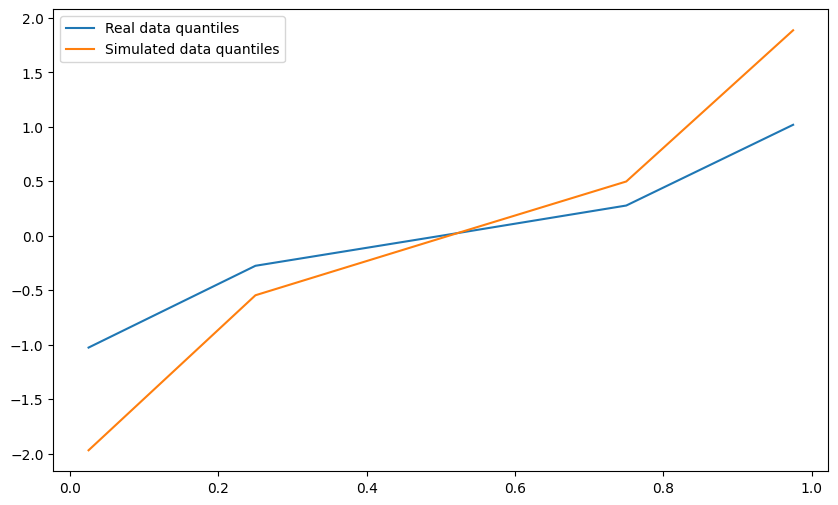

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.001250792900656949


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.6692371584514436


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -13.7661


Real max:  DXY    2.51896
dtype: float64
Simulated max:  10.8361




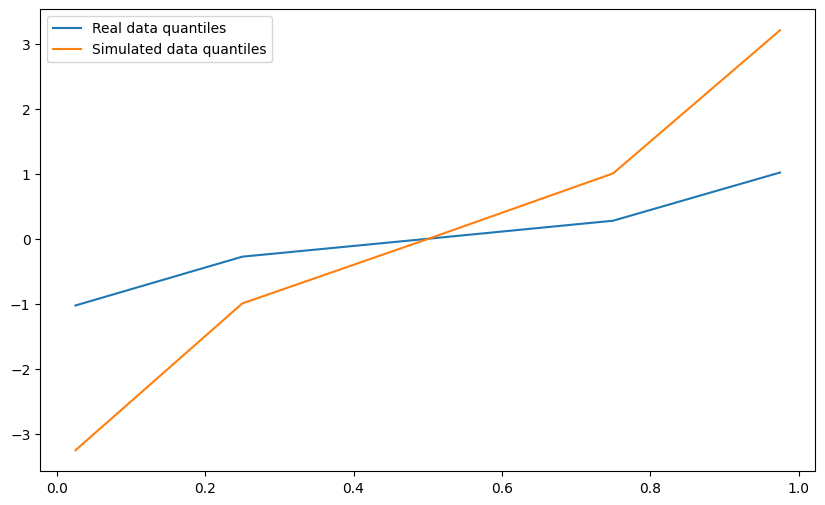

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.0017797018203332784


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.734709084781178


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -5.17362


Real max:  DXY    2.51896
dtype: float64
Simulated max:  5.97602




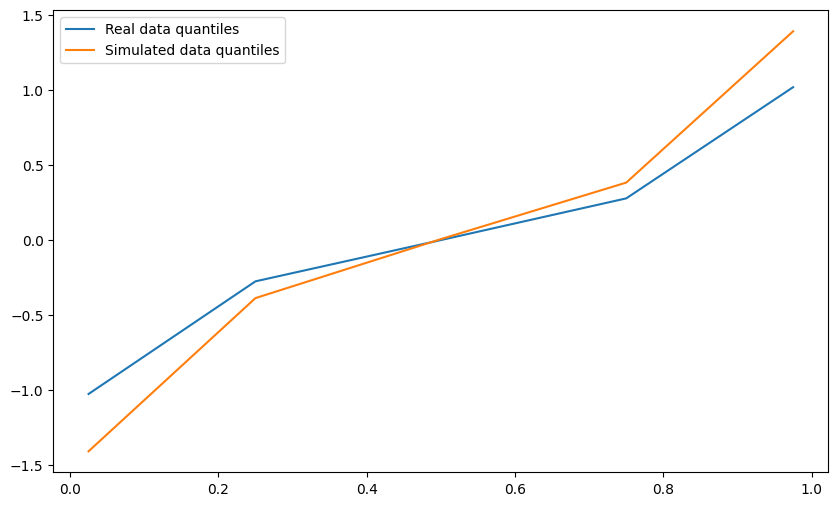

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  0.005525487992789618


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.7149943248366855


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -3.89438


Real max:  DXY    2.51896
dtype: float64
Simulated max:  3.29002




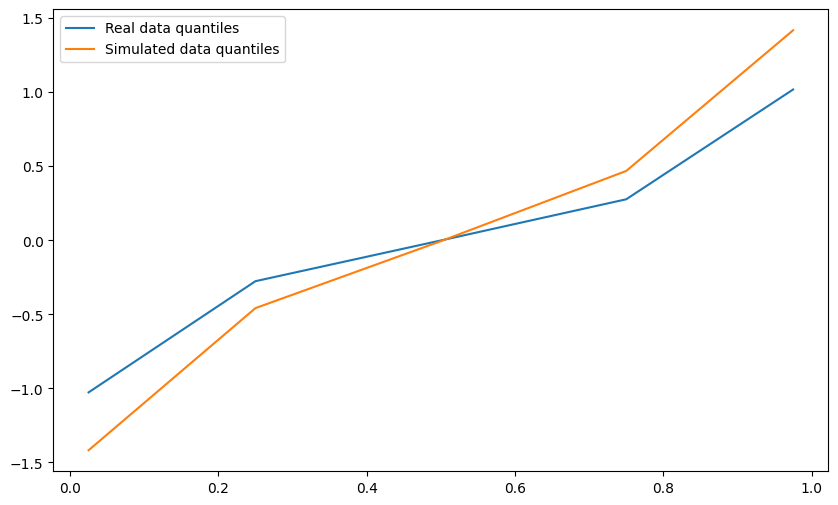

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.020152324273305558


Real std:  DXY    0.49879
dtype: float64
Simulated std:  0.5772364116576332


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -4.09063


Real max:  DXY    2.51896
dtype: float64
Simulated max:  4.32495




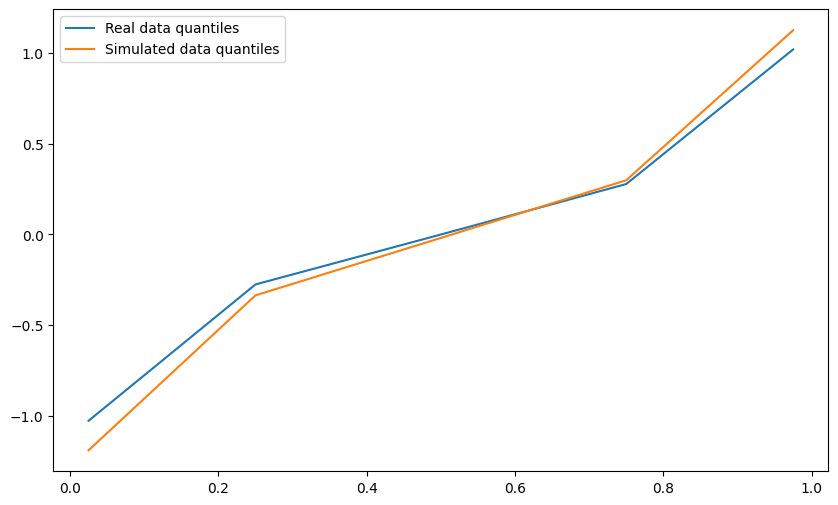

Real mean:  DXY   -0.002077
dtype: float64
Simulated mean:  -0.003157598485018426


Real std:  DXY    0.49879
dtype: float64
Simulated std:  1.4068348512899982


Real min:  DXY   -3.057377
dtype: float64
Simulated min:  -5.38585


Real max:  DXY    2.51896
dtype: float64
Simulated max:  5.8779




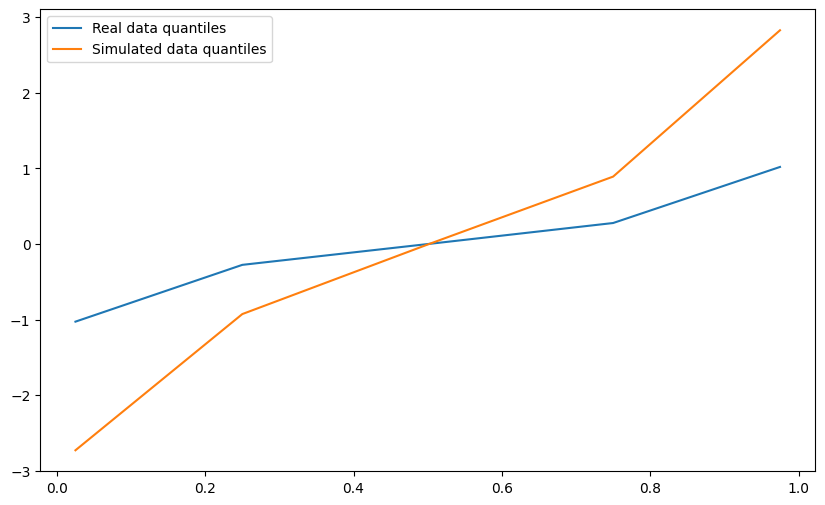

In [6]:
# Loop through rows in garch_y_sim (which each represent a simulated time series) and calculate the mean, stddev, and quantiles. Then compare to the real data.

real_mean = real_data.mean()
real_std = real_data.std()
real_quantiles = real_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
real_min = real_data.min()
real_max = real_data.max()

simulated_means = []
simulated_stds = []
simulated_quantiles = []
simulated_mins = []
simulated_maxs = []

for row in range(garch_y_sim.shape[0]):
    sim_data = garch_y_sim.iloc[row]

    sim_mean = sim_data.mean()
    sim_std = sim_data.std()
    sim_quantiles = sim_data.quantile([0.025, 0.25, 0.5, 0.75, 0.975])
    sim_min = sim_data.min()
    sim_max = sim_data.max()

    simulated_means.append(sim_mean)
    simulated_stds.append(sim_std)
    simulated_quantiles.append(sim_quantiles)
    simulated_mins.append(sim_min)
    simulated_maxs.append(sim_max)

# Plot for comparison at select indices:
indices = [row for row in range(0, len(simulated_means), len(simulated_means)//10)]

for idx in indices:
    sim_mean = simulated_means[idx]
    sim_std = simulated_stds[idx]
    sim_quantiles = simulated_quantiles[idx]
    sim_min = simulated_mins[idx]
    sim_max = simulated_maxs[idx]


    print("Real mean: ", real_mean)
    print("Simulated mean: ", sim_mean)
    print("\n")

    print("Real std: ", real_std)
    print("Simulated std: ", sim_std)
    print("\n")

    print("Real min: ", real_min)
    print("Simulated min: ", sim_min)
    print("\n")

    print("Real max: ", real_max)
    print("Simulated max: ", sim_max)
    print("\n")

    # Plot quantiles
    plt.figure(figsize=(10, 6))
    plt.plot(real_quantiles, label="Real data quantiles")
    plt.plot(sim_quantiles, label="Simulated data quantiles")
    plt.legend()

    plt.show()




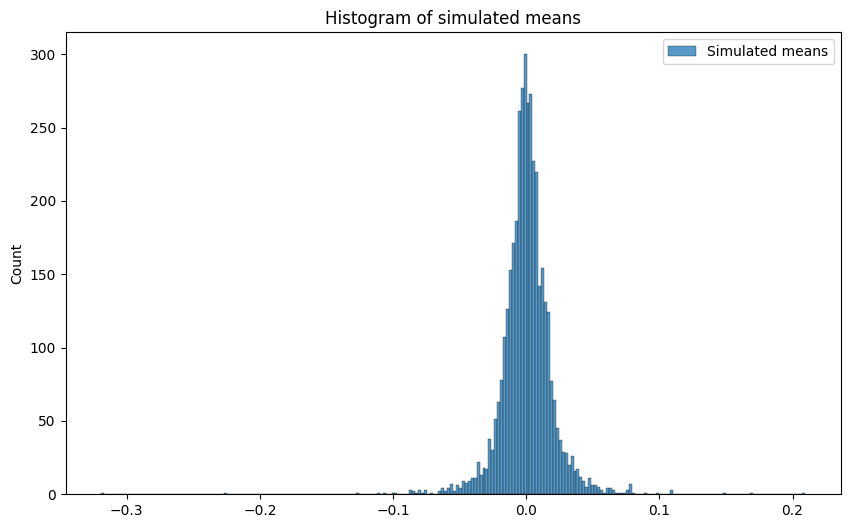

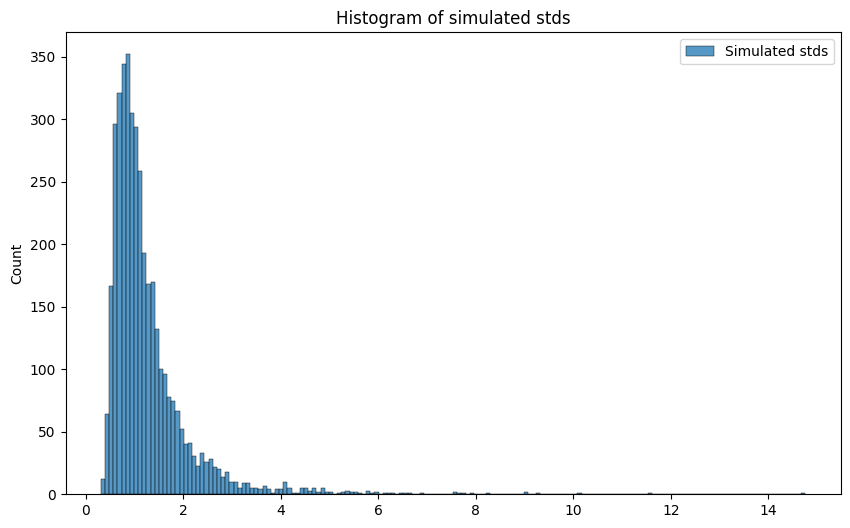

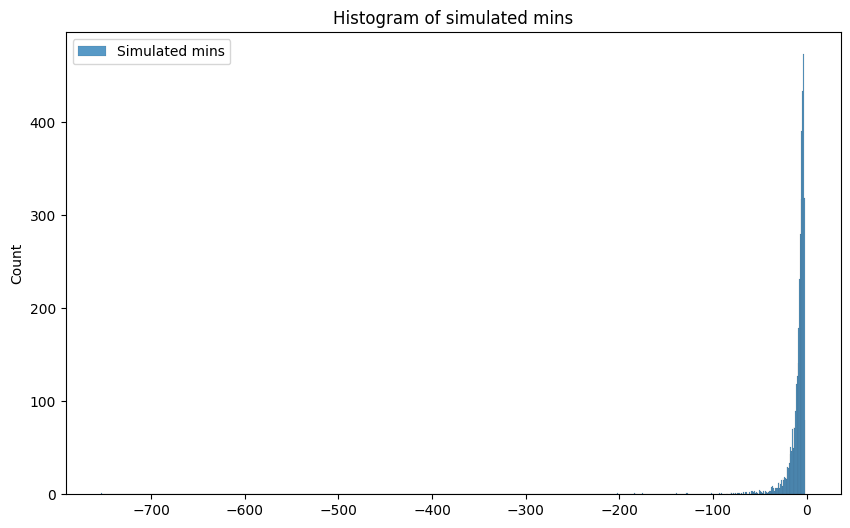

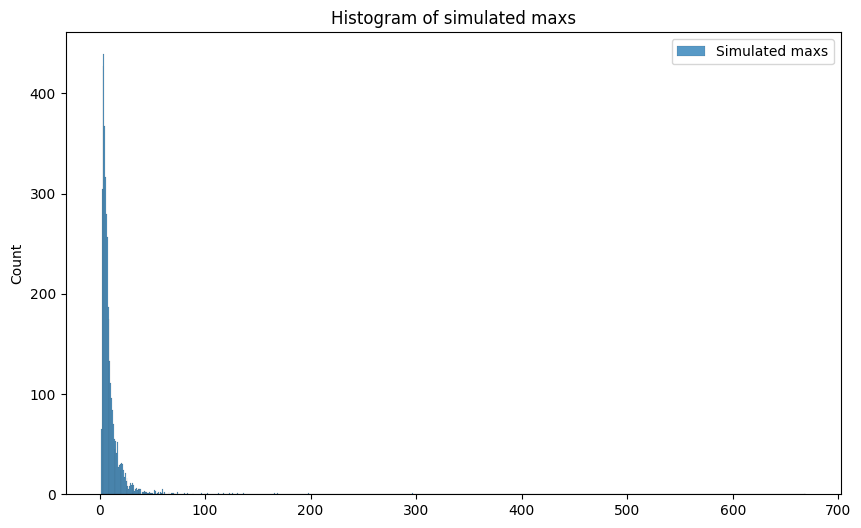

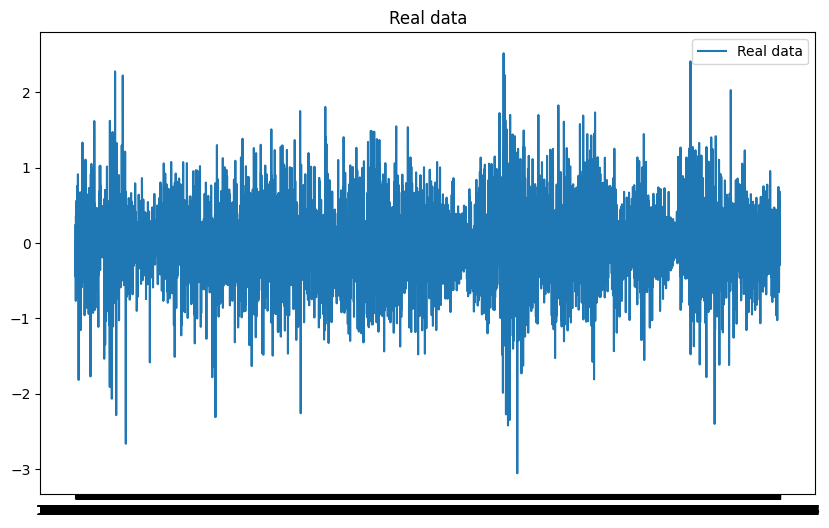

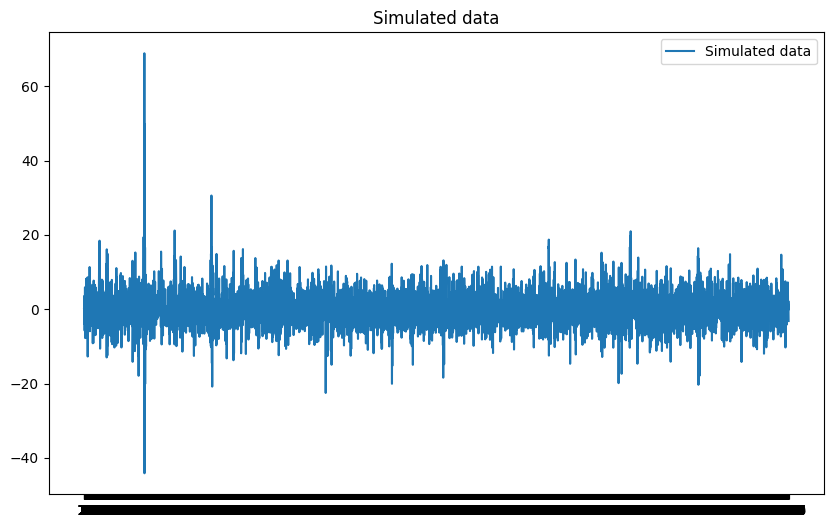

In [7]:
# Plot histograms of the means and stds
plt.figure(figsize=(10, 6))
sns.histplot(simulated_means, label="Simulated means")
plt.title("Histogram of simulated means")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(simulated_stds, label="Simulated stds")
plt.title("Histogram of simulated stds")
plt.legend()
plt.show()

# Plot histograms of the mins and maxs
plt.figure(figsize=(10, 6))
sns.histplot(simulated_mins, label="Simulated mins")
plt.title("Histogram of simulated mins")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(simulated_maxs, label="Simulated maxs")
plt.title("Histogram of simulated maxs")
plt.legend()
plt.show()

# Plot the real data and simulated data for comparison
plt.figure(figsize=(10, 6))
plt.plot(real_data, label="Real data")
plt.title("Real data")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(garch_y_sim.iloc[0], label="Simulated data")
plt.title("Simulated data")
plt.legend()
plt.show()





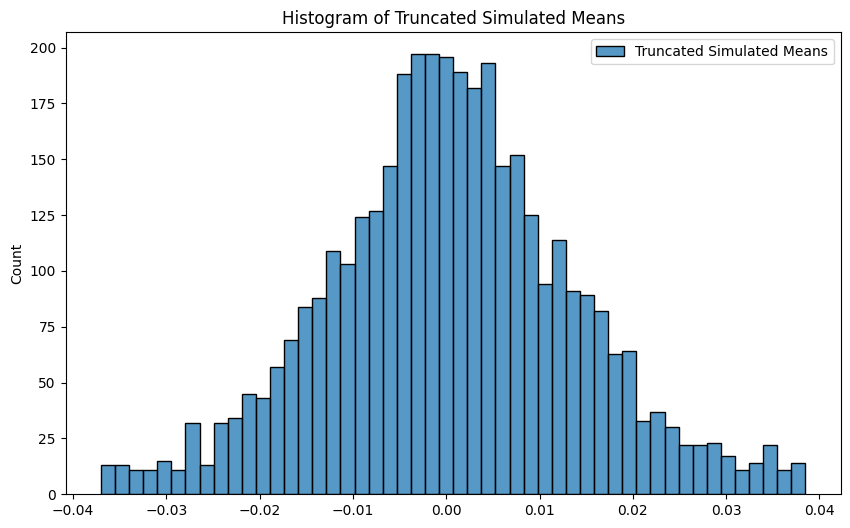

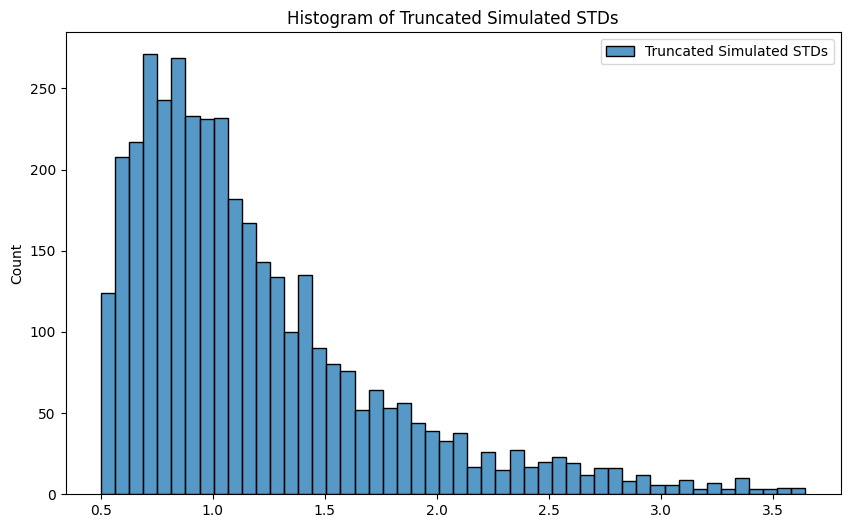

In [8]:
# Create truncated histograms of the means and stds
# Convert to NumPy arrays if not already (assuming they might be lists or pandas Series)
simulated_means = np.array(simulated_means)
simulated_stds = np.array(simulated_stds)
simulated_mins = np.array(simulated_mins)
simulated_maxs = np.array(simulated_maxs)

# Calculate quantiles
q_low = 0.025
q_high = 0.975

low_quantile_means = np.quantile(simulated_means, q_low)
high_quantile_means = np.quantile(simulated_means, q_high)
truncated_simulated_means = simulated_means[(simulated_means > low_quantile_means) & (simulated_means < high_quantile_means)]

low_quantile_stds = np.quantile(simulated_stds, q_low)
high_quantile_stds = np.quantile(simulated_stds, q_high)
truncated_simulated_stds = simulated_stds[(simulated_stds > low_quantile_stds) & (simulated_stds < high_quantile_stds)]

low_quantile_mins = np.quantile(simulated_mins, q_low)
high_quantile_mins = np.quantile(simulated_mins, q_high)
truncated_simulated_mins = simulated_mins[(simulated_mins > low_quantile_mins) & (simulated_mins < high_quantile_mins)]

low_quantile_maxs = np.quantile(simulated_maxs, q_low)
high_quantile_maxs = np.quantile(simulated_maxs, q_high)
truncated_simulated_maxs = simulated_maxs[(simulated_maxs > low_quantile_maxs) & (simulated_maxs < high_quantile_maxs)]

# Plot histograms of the truncated means and stds
plt.figure(figsize=(10, 6))
sns.histplot(truncated_simulated_means, label="Truncated Simulated Means", bins=50)
plt.title("Histogram of Truncated Simulated Means")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(truncated_simulated_stds, label="Truncated Simulated STDs", bins=50)
plt.title("Histogram of Truncated Simulated STDs")
plt.legend()
plt.show()